Callbacks adalah fungsi khusus yang dijalankan pada tahap tertentu dalam proses training. Callbacks dapat membantu dalam mencegah overfitting, memvisualisasikan kemajuan pelatihan, men-debug kode, menyimpan model saat proses training, menggenerate logs, dll.
<br>
<br>
Tahap-tahap tertentu pada saat training di mana kita bisa memanggil callback:
* on_epoch_end: this is triggered when an epoch ends.
* on_batch_begin: this is triggered when a new batch is passed for training.
* on_batch_end: when a batch is finished with training.
* on_train_begin: when the training starts.
* on_train_end: when the training ends.
<br><br>



In [1]:
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt

Datasetnya adalah cifar10

In [2]:
(x_train, y_train), (x_test, y_test)= keras.datasets.cifar10.load_data()

x_train= x_train/255
x_test= x_test/255

labels= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

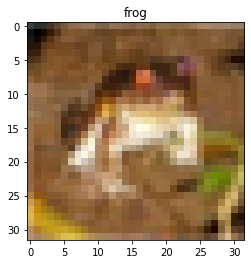

In [3]:
plt.imshow(x_train[0])
plt.title(labels[y_train[0][0]])
plt.show()

In [4]:
model= keras.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=x_train[0].shape),
    keras.layers.AvgPool2D(pool_size=2, strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'),
    keras.layers.AvgPool2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='sigmoid'),
    keras.layers.Dense(84, activation='sigmoid'),
    keras.layers.Dense(len(labels))
])

In [6]:
# optimizer = keras.optimizers.SGD(learning_rate=0.5)
# loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=20)

### 1. Early Stopping

Callback ini memungkinkan kita untuk menghentikan proses training saat model tidak lagi meningkat. Early Stopping cukup berguna terutama untuk mencegah terjadinya overgfitting. Parameter:

* monitor: the names of the metrics we want to monitor.
* min_delta: the minimum amount of improvement we expect in every epoch.
* patience: the number of epochs to wait before stopping the training.
* verbose: whether or not to print additional logs.
* mode: defines whether the monitored metrics should be increasing, decreasing, or inferred from the name; possible values are 'min', 'max', or 'auto'.
* baseline: values for the monitored metrics.
* restore_best_weights: if set to True, the model will get the weights of the epoch 

In [7]:
early_stopping_callbacks= keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.08, patience=5, mode='auto', baseline=0.9)

optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[early_stopping_callbacks])

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3285 - accuracy: 0.5182
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3017 - accuracy: 0.5292
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2806 - accuracy: 0.5384
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2609 - accuracy: 0.5459
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2419 - accuracy: 0.5536


Kita bisa melihat proses training terhenti sebelum memenuhi epoch dikarenakan akurasi tidak lagi naik sebesar >0.08 (sesuai parameter min_delta)

### 2. Learning Rate Scheduler

Merupakan callback untuk mengubah lr (learning rate) pada epoch tertentu melalui fungsi yang diserahkan pada parameter. Fungsinya akan menerima 2 parameter: epoch dan learning rate. Parameter:

* schedule: this is a function that takes the epoch index and returns a new learning rate.
* verbose: whether or not to print additional logs.

Misal kondisi updatenya adalah: jika epoch lebih kecil dari dua: kembalikan lr tanpa diubah, jika 3 atau 4 maka bagi lr dengan 2, selain dari itu, kembalikan lr yang dikali 0.9

In [8]:
def schedule(epoch, lr):
    if(epoch<2):
        return lr
    elif(epoch<4):
        return lr*0.5
    else:
        return lr*0.9

learning_rate_scheduler_callback= keras.callbacks.LearningRateScheduler(schedule)

In [9]:
optimizer = keras.optimizers.SGD(learning_rate=0.5)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[learning_rate_scheduler_callback])

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3305 - accuracy: 0.5207 - lr: 0.5000
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2657 - accuracy: 0.5457 - lr: 0.5000
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1600 - accuracy: 0.5846 - lr: 0.2500
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1053 - accuracy: 0.6066 - lr: 0.1250
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0866 - accuracy: 0.6111 - lr: 0.1125
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0708 - accuracy: 0.6191 - lr: 0.1013
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0567 - accuracy: 0.6238 - lr: 0.0911
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0417 - accuracy: 0.6304 - lr: 0.0820
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.02

Terlihat saat epoch>2 learning ratenya berubah

### 3. Model Checkpoint

Berfungsi untuk menyimpan model atau weight dari model saat proses training. Yang nantinya model atau weight ini bisa diload nantinya. Callback model checkpoint menyimpan model/weight secara berkala, berdasarkan parameter save_freq. Jika nama file model/weight sama dengan nama file sebelumnya, maka akan direplace. Parameter:

* filepath: path for saving the model. You can pass the file path with formatting options like model-{epoch:02d}-{val_loss:0.2f}; this saves the model with the mentioned values in the name.
* monitor: name of the metrics to monitor.
* save_best_only: if True, the best model will not be overridden.
* mode: defines whether the monitored metrics should be increasing, decreasing, or inferred from the name; possible values are 'min', 'max', or 'auto'.
* save_weights_only: if True, only the weights of the models will be saved. Otherwise the full model will be saved.
* save_freq: if 'epoch', the model will be saved after every epoch. If an integer value is passed, the model will be saved after the integer number of batches (not to be confused with epochs).

Misal kita akan menyimpan weight hasil proses training

In [10]:
model_checkpoint_callback= tf.keras.callbacks.ModelCheckpoint(filepath='weight_checkpoints/weight - epoch: {epoch:0.2f} - accuracy {accuracy:0.4f}.ckpt', monitor= 'accuracy', save_freq='epoch', save_weights_only=True)
model.fit(x_train, y_train, epochs=3, callbacks=[model_checkpoint_callback])

Melihat daftar file dari direktori tempat menyimpan file model/weight

In [17]:
import os

os.listdir('weight_checkpoints')

['weight - epoch: 1.00 - accuracy 0.7792.ckpt.data-00000-of-00001',
 'checkpoint',
 'weight - epoch: 3.00 - accuracy 0.7838.ckpt.index',
 'weight - epoch: 2.00 - accuracy 0.7819.ckpt.index',
 'weight - epoch: 1.00 - accuracy 0.7792.ckpt.index',
 'weight - epoch: 3.00 - accuracy 0.7838.ckpt.data-00000-of-00001',
 'weight - epoch: 2.00 - accuracy 0.7819.ckpt.data-00000-of-00001']

Meload weight dari model yang telah kita save. Syarat untuk meload weight adalah struktur modelnya harus sama, maka dari itu kita akan membuat model baru lalu baru kita akan meload weightnya

In [12]:
# Membuat model baru
new_model= keras.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=x_train[0].shape),
    keras.layers.AvgPool2D(pool_size=2, strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'),
    keras.layers.AvgPool2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='sigmoid'),
    keras.layers.Dense(84, activation='sigmoid'),
    keras.layers.Dense(len(labels))
])

new_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Meload weight pada model
new_model.load_weights('weight_checkpoints/weight - epoch: 3.00 - accuracy 0.7838.ckpt')

In [13]:
model.evaluate(x_test, y_test)
new_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2314 - accuracy: 0.6124


[1.2313624620437622, 0.6123999953269958]

### 4. Reduce Lr On Plateau

Mirip dengan callback learning rate scheduler, namun callback ini mengubah learning rate berdasarkan metrik bukannya epoch. Parameter:

* factor: the factor by which the learning rate should be decreased (new learning rate = old learning rate * factor).
* cooldown: the number of epochs to wait before restarting the monitoring of the metrics.
* min_lr: the minimum bound for the learning rate (the learning rate can’t go below this).

In [14]:
reduce_lr_on_plateau_callback= keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor= 0.5, patience=1, min_lr=0.1, min_delta=0.0001)
model.fit(x_train, y_train, epochs=3, callbacks=[reduce_lr_on_plateau_callback])

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0103 - accuracy: 0.6406 - lr: 0.0664
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0007 - accuracy: 0.6451 - lr: 0.0664
Epoch 3/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9926 - accuracy: 0.6483 - lr: 0.0664


Learning ratenya tidak berubah karena selalu memenuhi kondisi peningkatan > 0.0001

### 5. Custom Callback

Kita bisa membuat callback sendiri dengan membuat kelas turunan dari tensorflow.keras.callbacks.Callback . Penjelasan pada https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback

Kita akan membuat callback untuk melakukan plot pada saat proses train berakhir

In [15]:
class plot_training_accuracy(keras.callbacks.Callback):
    def __init__(self, from_zero= False):
        self.epochs_list= []
        self.accuracy_list= []

        if(from_zero):
            self.epochs_list.append(0)
            self.accuracy_list.append(0)

        plt.style.use('fivethirtyeight')

    # def on_epoch_end(self, epoch, logs=None):
    #     self.epochs_list.append(epoch+1)
    #     self.accuracy_list.append(logs['accuracy'])
    #     print('\naasdada',logs['accuracy'])
    #     print(self.epochs_list)
    #     print(self.accuracy_list)
    #     plt.plot(self.epochs_list, self.accuracy_list, c='r')
    #     plt.show()

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_list.append(epoch+1)
        self.accuracy_list.append(logs['accuracy'])

    def on_train_end(self, logs=None):
        plt.plot(self.epochs_list, self.accuracy_list)
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.show()

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9840 - accuracy: 0.6523
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9761 - accuracy: 0.6527
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9685 - accuracy: 0.6569
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9599 - accuracy: 0.6598
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9526 - accuracy: 0.6638
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9441 - accuracy: 0.6666
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9362 - accuracy: 0.6676
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9276 - accuracy: 0.6707
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9186 - accuracy: 0.6753
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.911

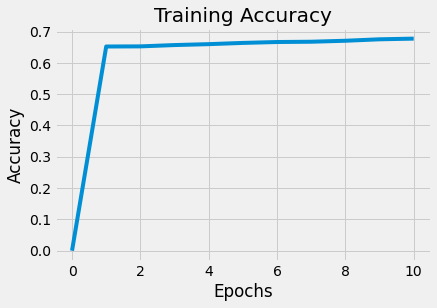

In [16]:
model.fit(x_train, y_train, epochs=10, callbacks=[plot_training_accuracy(True)])

### Callbacks lainnya:


6. Tensorboard
7. CSVLogger: untuk menyimpan accuracy, loss, dll pada file csv
8. LambdaCallback: seperti Custom callback namun hanya berupa fungsi
9. RemoteMonitor: untuk melakukan POST pada suatu API
10. TerminateOnNan: callback ini akan menghentikan proses training jika loss menjadi NaN